<a href="https://colab.research.google.com/github/Chandr25/Almabetterclassificationproject/blob/main/Chandrashekhar_Awate_Mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

#Data Description 
#Battery_power - Total energy a battery can store in one time measured in mAh
#Blue - Has bluetooth or not
#Clock_speed - speed at which microprocessor executes instructions
#Dual_sim - Has dual sim support or not
#Fc - Front Camera mega pixels
#Four_g - Has 4G or not
#Int_memory - Internal Memory in Gigabytes
#M_dep - Mobile Depth in cm
#Mobile_wt - Weight of mobile phone
#N_cores - Number of cores of processor
#Pc - Primary Camera mega pixels
#Px_height - Pixel Resolution Height
#Px_width - Pixel Resolution Width
#Ram - Random Access Memory in Mega Bytes
#Sc_h - Screen Height of mobile in cm
#Sc_w - Screen Width of mobile in cm
#Talk_time - longest time that a single battery charge will last when you are
#Three_g - Has 3G or not
#Touch_screen - Has touch screen or not
#Wifi - Has wifi or not
#Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
#2(high cost) and 3(very high cost).





Importing some liabraries for EDA 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Mounting drive and reading data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Capstone Project - Classification/data_mobile_price_range.csv")

In [3]:
# Lets look at top records
df.head(5)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
#shape of the data
df.shape

(2000, 21)

In [5]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# lets look at the columns 
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
#lets know some statistics
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [8]:
#checking correlation
df.corr()

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

##checking class imbalance

In [9]:
#cheking class imbalance by value counts
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


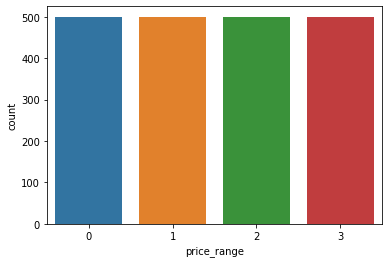

In [10]:
#lets visualize same thing
sns.countplot(df["price_range"])

#There is no class imbalance in target variable

In [11]:
df.corr()["price_range"]

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

Majorly impacting properties on price of phone are Ram,Battery power and pixel resolution.while clock speed ,mobile wieght and whether it is screen touch phone or not impacting price of mobile negatively.

##Lets do some visualisation for EDA

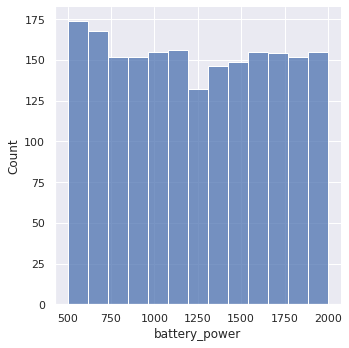

In [12]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df["battery_power"])
plt.show()

The battery power ranges between 600-2000

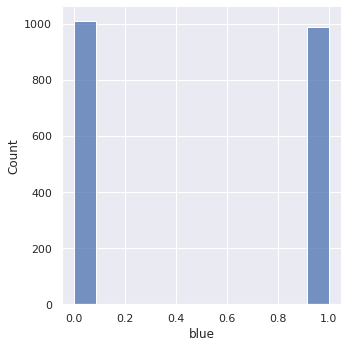

In [13]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df["blue"])
plt.show()

In [14]:
df['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

So there are 20 more number of phones who  have bluetooth than  not having one.

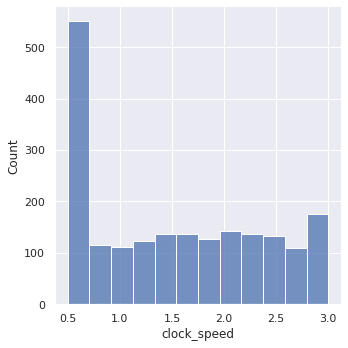

In [15]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df["clock_speed"])
plt.show()

clock speed ranges between 0.6 to 3

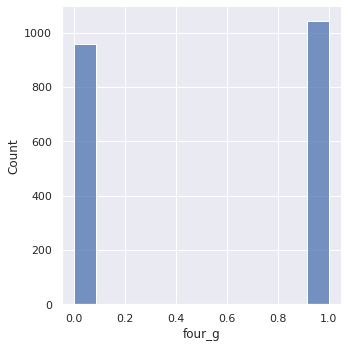

In [16]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df["four_g"])
plt.show()

In [17]:
df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

The number of phone having 4G feature are more than not having that feature.

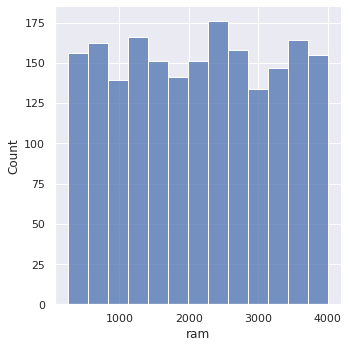

In [18]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df["ram"])
plt.show()

The random access memory of the phone ranges between 250 megabytes to 4000 megabytes

In [19]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

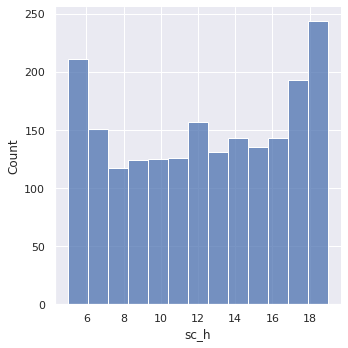

In [20]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df["sc_h"])
plt.show()

The hight of screen of mobile phones ranges between 3cm to 18cm

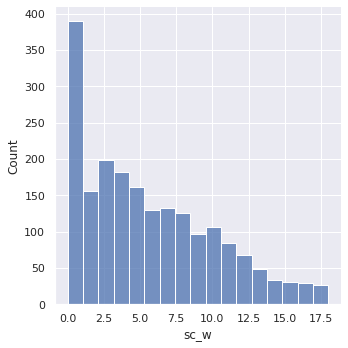

In [21]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df["sc_w"])
plt.show()

The width of screen of mobile phones ranges between 2cm to 17cm

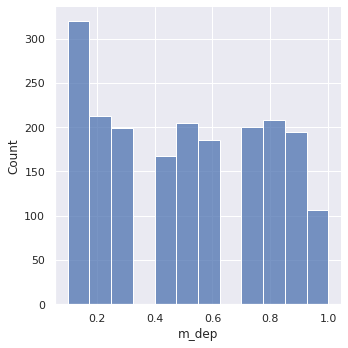

In [22]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df["m_dep"])
plt.show()

The depth or thickness of mobile ranges between something around 0.2cm to 1cm

In [23]:
df['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

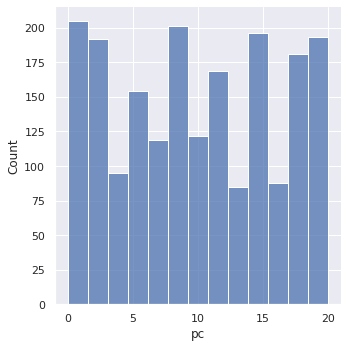

In [24]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df["pc"])
plt.show()

The camera megapixels ranges between 1 to 20

In [25]:
df['pc'].value_counts()

10    122
7     119
9     112
20    110
1     104
14    104
0     101
2      99
17     99
6      95
4      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: pc, dtype: int64

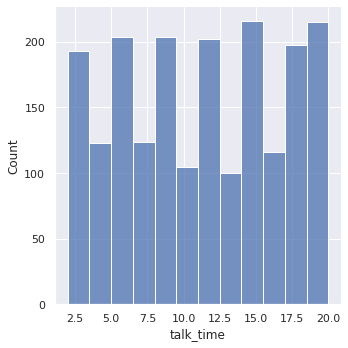

In [26]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df['talk_time'])
plt.show()

The talktime(longest time that a single battery charge will last when you are) ranges between 2.5 to 20hrs

In [27]:
df['talk_time'].value_counts()

7     124
4     123
16    116
15    115
19    113
6     111
10    105
8     104
11    103
20    102
14    101
13    100
18    100
9     100
2      99
12     99
17     98
3      94
5      93
Name: talk_time, dtype: int64

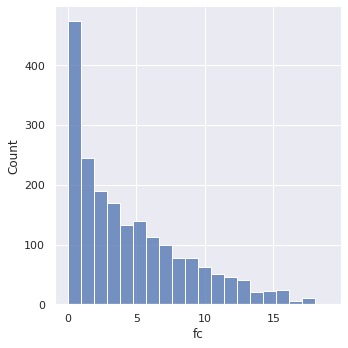

In [28]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df["fc"])
plt.show()

The front camera of mobile phones ranges between 1 mp to 17mp

#Lets check some relation of each feature with another feature

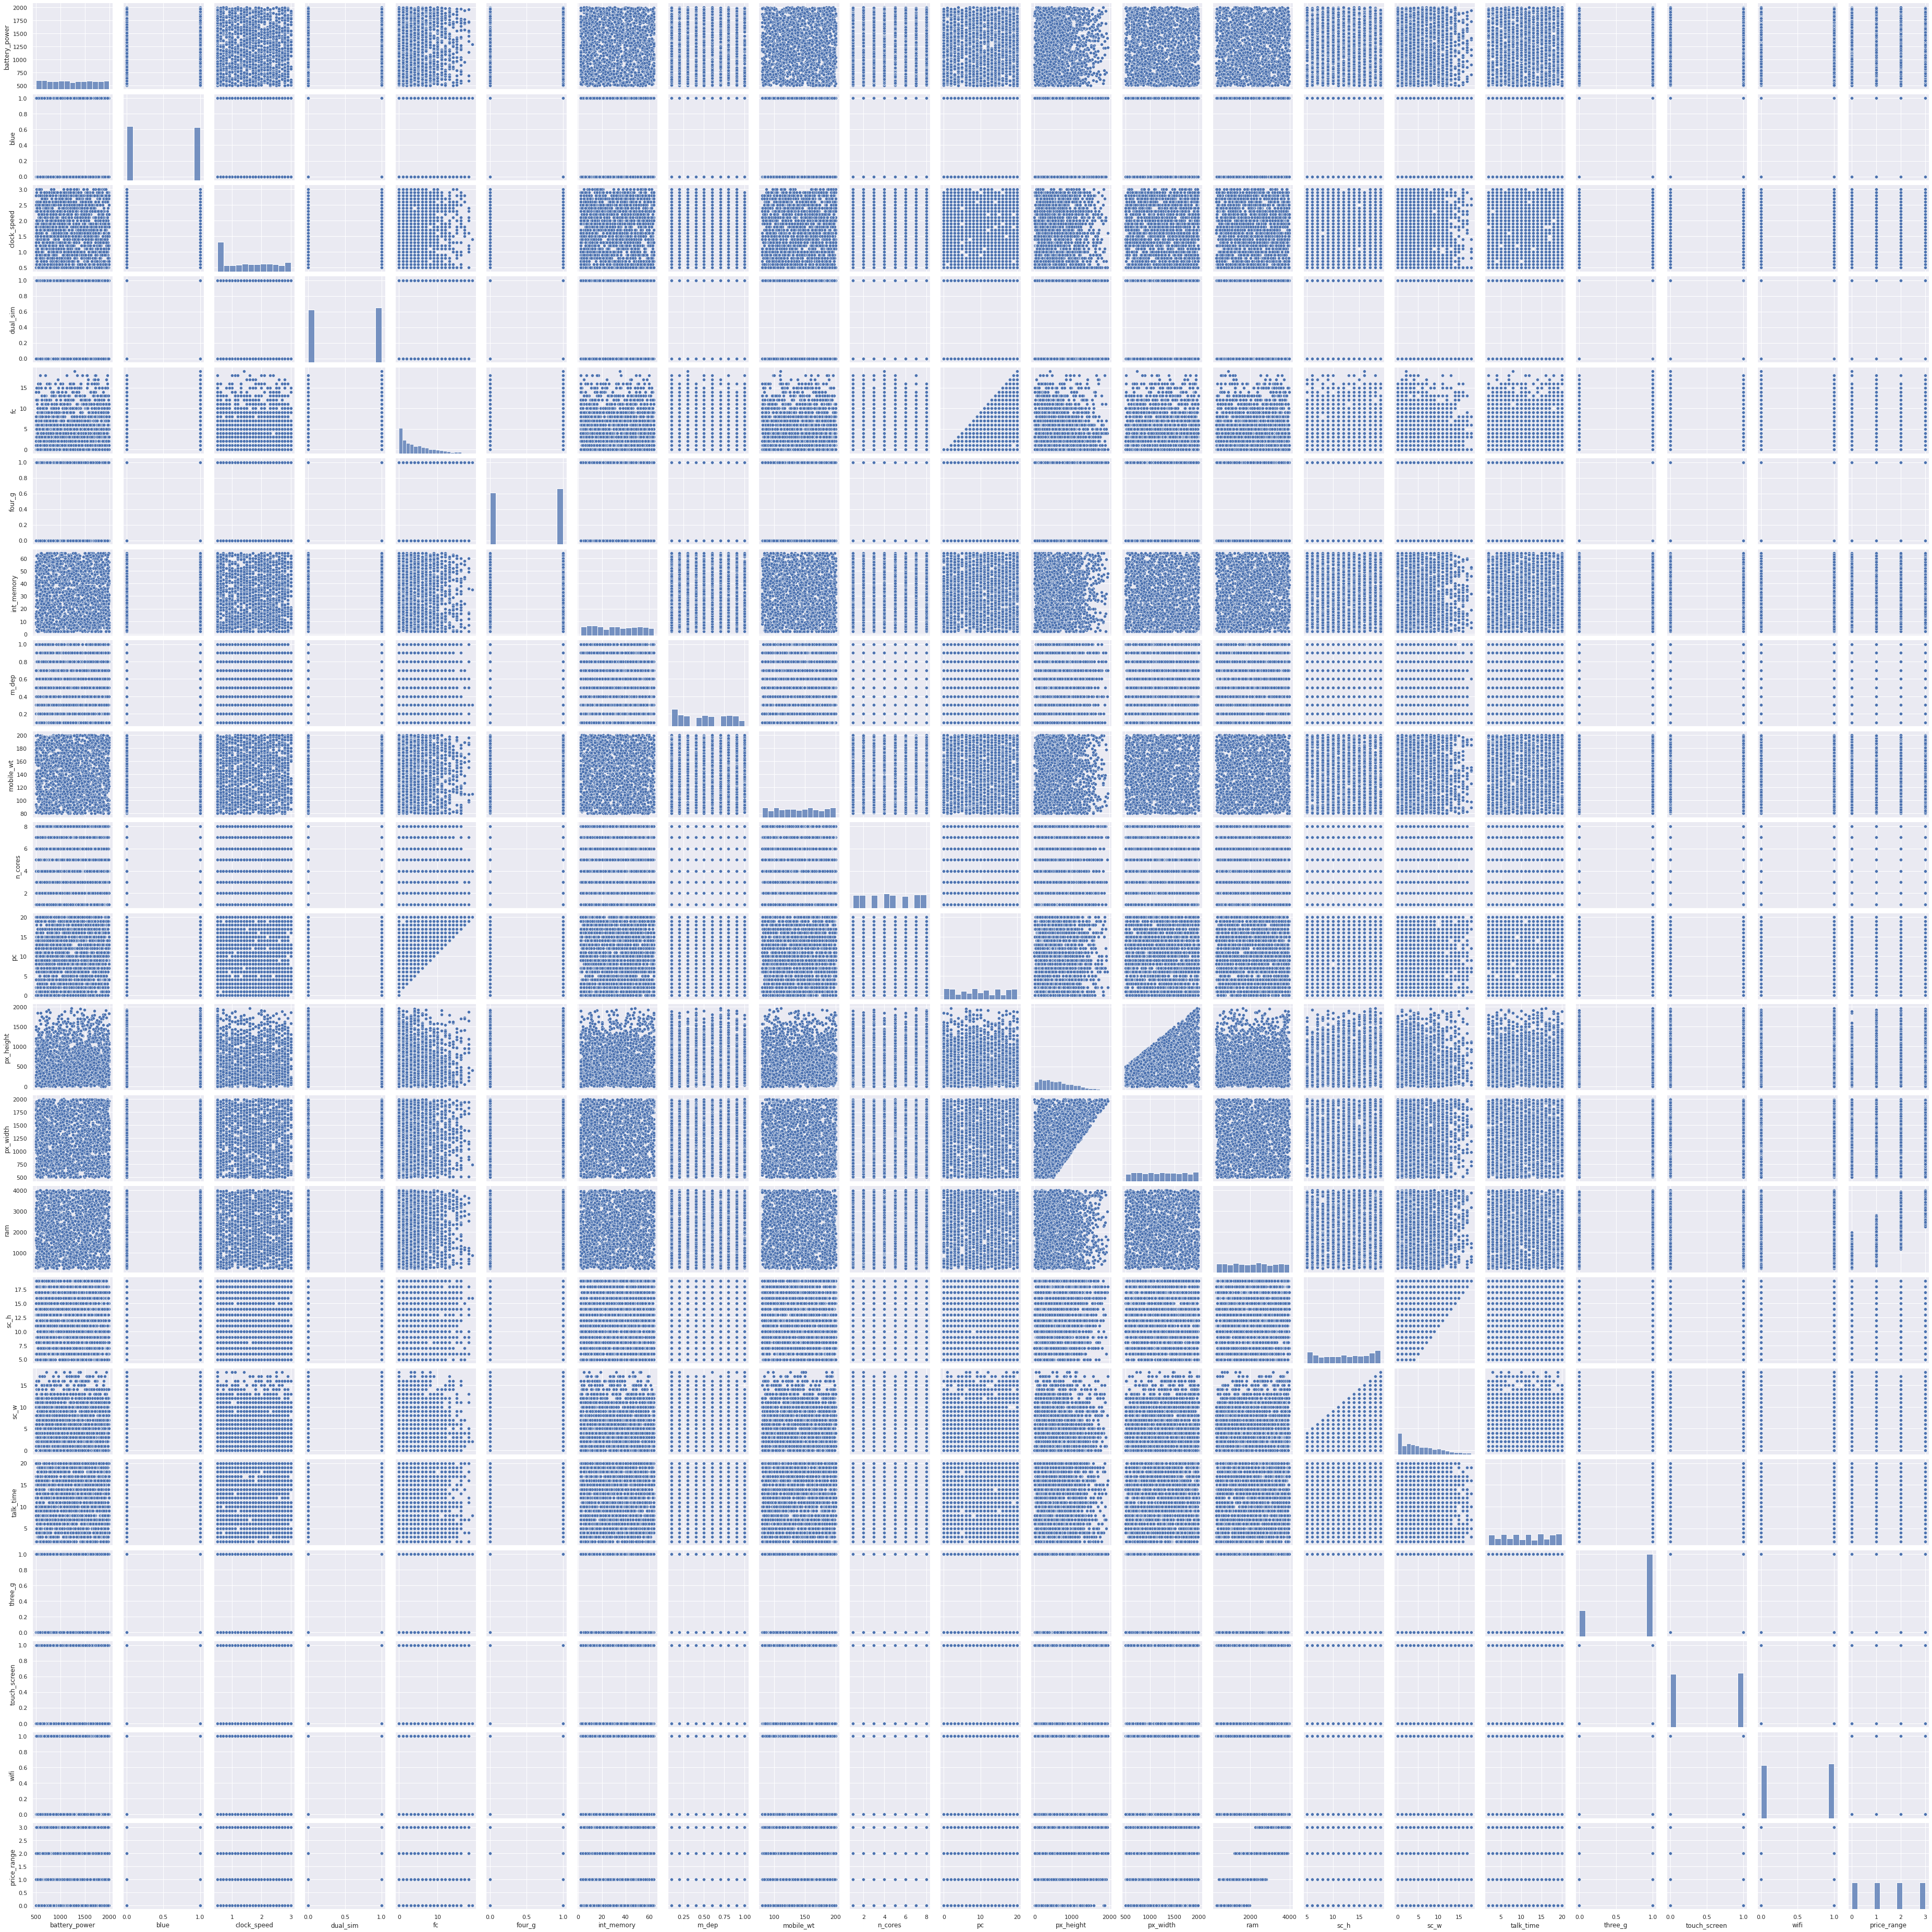

In [29]:
sns.pairplot(data = df)

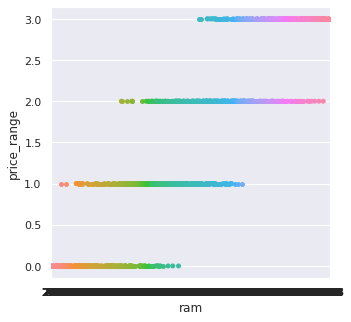

In [30]:
sns.stripplot(x='ram',y='price_range',data = df)

In [31]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

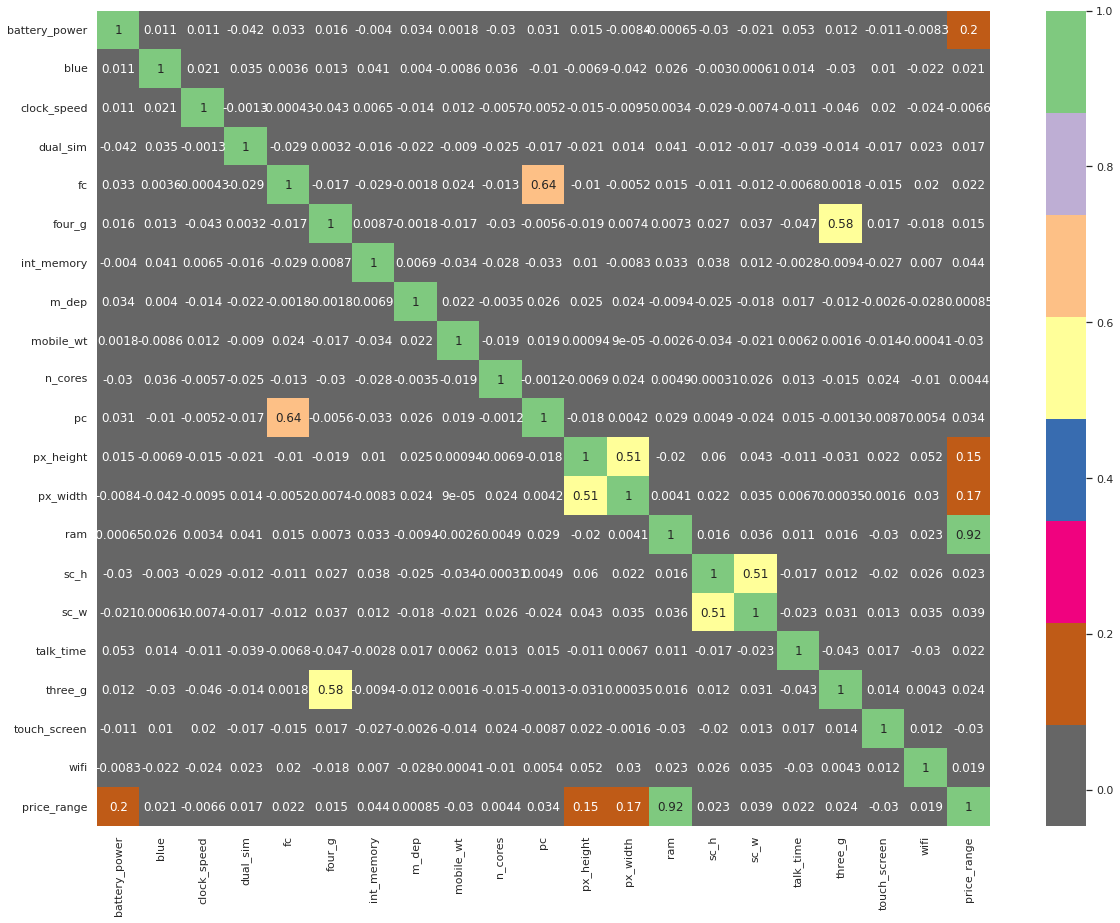

In [32]:
#importing some visulization liabraries
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Accent_r)


From the above heatmap we can see that 

1.   The price of mobile depends upon mostly Ram,battery power,screen hight and screen width.
2.   Whereas clock spped,weight of the phone and touch screen are the parameters which inversly affecting the price of phone.



##Lets look at is there any outliers

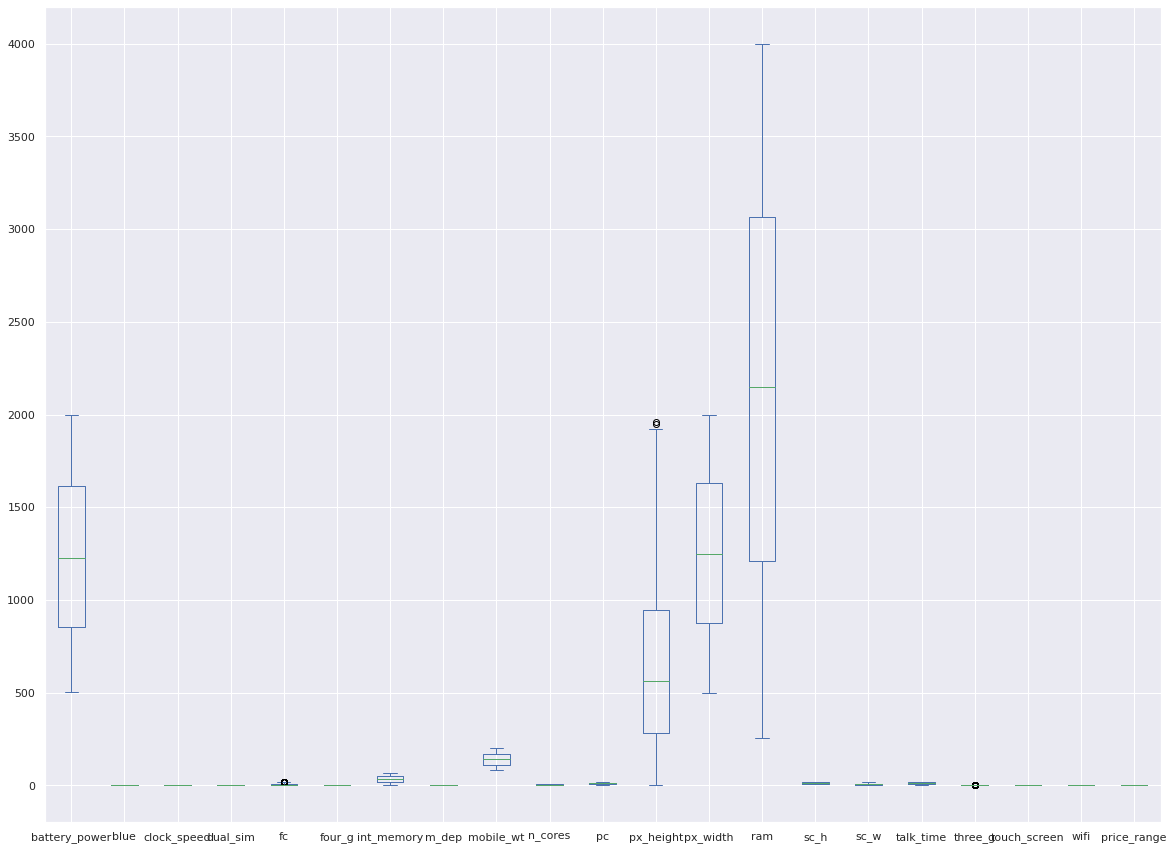

In [33]:
#lets check the outliers in the data
df.plot(kind = 'box',figsize=(20,15))

There are some outliers in some features but we will neglect them as they are few.

##Preprocessing for Model building

In [34]:
# Set variables for the targets and features
from sklearn.model_selection import train_test_split
y = df['price_range']
X = df.drop('price_range', axis=1)

# Split the data into training and validation sets
X_train,X_test,Y_train,Y_test = train_test_split(X, y, random_state=7)

In [35]:
#Transformation
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



##support vector Classifier

In [36]:
#support vector Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)

SVC()

In [37]:
pred1 = svc.predict(X_test)
pred1

array([3, 3, 2, 0, 0, 2, 3, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       1, 1, 2, 1, 3, 1, 1, 3, 3, 0, 0, 2, 3, 2, 2, 1, 1, 3, 2, 3, 2, 0,
       2, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1, 2, 3, 3, 1, 1, 1, 3, 0, 2,
       3, 1, 0, 3, 0, 1, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 2, 1, 1, 0, 0, 2,
       1, 3, 1, 3, 3, 0, 0, 3, 1, 0, 3, 1, 2, 0, 3, 2, 0, 0, 0, 2, 1, 2,
       3, 2, 2, 0, 0, 2, 0, 2, 0, 3, 2, 1, 0, 2, 3, 0, 1, 0, 0, 3, 3, 2,
       1, 0, 3, 1, 3, 1, 2, 0, 1, 0, 2, 3, 3, 2, 0, 1, 2, 0, 2, 0, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 0, 1, 1, 0, 1, 0,
       3, 2, 1, 0, 2, 2, 3, 0, 0, 3, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1,
       3, 0, 0, 3, 2, 0, 0, 1, 3, 0, 1, 0, 0, 2, 2, 1, 0, 2, 3, 3, 1, 3,
       2, 0, 3, 1, 3, 2, 2, 2, 0, 3, 2, 0, 1, 1, 1, 0, 2, 2, 1, 3, 2, 3,
       1, 1, 2, 3, 3, 3, 0, 1, 3, 0, 0, 1, 2, 1, 3, 3, 3, 1, 1, 1, 1, 3,
       0, 3, 1, 2, 2, 3, 1, 3, 3, 0, 0, 3, 3, 2, 1, 1, 3, 2, 2, 1, 3, 2,
       0, 3, 3, 3, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0,

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix
svc_acc = accuracy_score(pred1,Y_test)
print(svc_acc)
print(confusion_matrix(pred1,Y_test))

0.878
[[125   4   0   0]
 [ 11  98  18   0]
 [  0   8 106  13]
 [  0   0   7 110]]


In [39]:
# Get the accuracy scores
train_class_preds = svc.predict(X_train)
test_class_preds = svc.predict(X_test)
train_accuracy = accuracy_score(train_class_preds,Y_train)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9866666666666667
The accuracy on test data is  0.878


*Some sort of overfitting is seen in our svc model.*

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred1))



              precision    recall  f1-score   support

           0       0.97      0.92      0.94       136
           1       0.77      0.89      0.83       110
           2       0.83      0.81      0.82       131
           3       0.94      0.89      0.92       123

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



##Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [42]:
pred2 = lr.predict(X_test)
pred2

array([3, 3, 2, 1, 0, 2, 3, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       1, 1, 2, 1, 3, 1, 2, 3, 3, 0, 0, 2, 3, 2, 3, 2, 1, 3, 2, 3, 2, 0,
       2, 1, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 1, 2, 3, 3, 1, 1, 1, 3, 0, 3,
       3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 2, 1, 1, 0, 0, 2,
       1, 3, 2, 3, 3, 0, 0, 3, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2,
       3, 2, 2, 0, 0, 2, 0, 2, 0, 3, 2, 1, 0, 2, 3, 0, 1, 0, 0, 3, 3, 2,
       1, 0, 3, 1, 3, 1, 2, 0, 1, 0, 2, 3, 3, 1, 0, 1, 2, 0, 2, 0, 3, 1,
       1, 1, 2, 1, 2, 3, 2, 2, 1, 2, 0, 0, 2, 3, 2, 3, 0, 1, 1, 0, 1, 0,
       3, 2, 1, 0, 2, 3, 3, 0, 0, 3, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1,
       3, 0, 0, 2, 2, 0, 0, 1, 3, 0, 1, 0, 0, 2, 2, 1, 0, 2, 3, 3, 1, 2,
       2, 0, 3, 1, 3, 2, 2, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 1, 0, 3, 3, 3,
       1, 1, 1, 2, 2, 3, 0, 1, 3, 0, 0, 1, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3,
       0, 3, 1, 2, 2, 3, 2, 3, 3, 0, 0, 3, 3, 2, 1, 1, 3, 3, 2, 1, 3, 2,
       0, 3, 2, 3, 2, 3, 1, 2, 1, 0, 2, 1, 3, 1, 0,

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix
lr_acc = accuracy_score(pred2,Y_test)
print(lr_acc)
print(confusion_matrix(pred2,Y_test))

0.962
[[130   3   0   0]
 [  6 105   6   0]
 [  0   2 124   1]
 [  0   0   1 122]]


In [44]:
# Get the accuracy scores
train_class_preds = lr.predict(X_train)
test_class_preds = lr.predict(X_test)
train_accuracy = accuracy_score(train_class_preds,Y_train)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9746666666666667
The accuracy on test data is  0.962


##Yes,we got optimal model for our problem.

In [45]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred2))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       136
           1       0.90      0.95      0.93       110
           2       0.98      0.95      0.96       131
           3       0.99      0.99      0.99       123

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



##Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [47]:
pred3  = dtc.predict(X_test)
pred3

array([2, 3, 2, 1, 0, 2, 3, 1, 1, 2, 1, 0, 3, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 1, 2, 1, 3, 1, 2, 3, 3, 0, 0, 3, 3, 2, 3, 2, 1, 3, 2, 2, 2, 0,
       2, 1, 0, 3, 1, 0, 2, 3, 2, 0, 2, 2, 1, 2, 3, 3, 1, 2, 1, 3, 0, 3,
       3, 1, 0, 3, 0, 1, 0, 1, 2, 0, 1, 0, 0, 3, 1, 3, 3, 1, 1, 0, 1, 2,
       1, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 1, 1, 0, 3, 1, 0, 1, 0, 3, 2, 2,
       3, 3, 2, 0, 0, 2, 0, 2, 0, 3, 2, 1, 0, 2, 3, 0, 1, 0, 0, 3, 3, 2,
       1, 0, 3, 1, 3, 1, 2, 0, 1, 0, 2, 3, 3, 1, 0, 1, 2, 0, 2, 0, 3, 1,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 3, 2, 3, 0, 1, 1, 0, 2, 0,
       2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2,
       3, 0, 0, 2, 2, 1, 0, 1, 3, 0, 1, 0, 0, 2, 2, 1, 1, 2, 3, 3, 1, 3,
       1, 0, 3, 1, 3, 2, 2, 2, 0, 3, 2, 0, 3, 0, 0, 0, 3, 1, 0, 3, 2, 3,
       1, 1, 1, 3, 3, 3, 0, 2, 3, 0, 0, 1, 3, 3, 3, 3, 3, 0, 1, 2, 1, 3,
       0, 3, 1, 2, 2, 3, 1, 3, 3, 0, 0, 3, 3, 2, 1, 1, 3, 3, 2, 1, 3, 2,
       0, 3, 3, 3, 2, 2, 1, 2, 0, 0, 2, 1, 3, 0, 0,

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix
dtc_acc = accuracy_score(pred3,Y_test)
print(dtc_acc)
print(confusion_matrix(pred3,Y_test))

0.832
[[126   9   0   0]
 [ 10  87  15   0]
 [  0  14  93  13]
 [  0   0  23 110]]


In [49]:
# Get the accuracy scores
train_class_preds = dtc.predict(X_train)
test_class_preds = dtc.predict(X_test)
train_accuracy = accuracy_score(train_class_preds,Y_train)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  0.832


There is some sort of overfitting seen in Decision tree model also.

In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred3))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       136
           1       0.78      0.79      0.78       110
           2       0.78      0.71      0.74       131
           3       0.83      0.89      0.86       123

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



##Naive Bayes model

In [51]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, Y_train)  

GaussianNB()

In [52]:
pred4  = classifier.predict(X_test)
pred4

array([2, 3, 2, 1, 0, 2, 3, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 2, 1, 3, 1, 2, 3, 3, 0, 0, 3, 3, 2, 3, 1, 1, 3, 2, 2, 2, 0,
       2, 1, 0, 3, 1, 0, 2, 3, 2, 0, 2, 2, 1, 2, 3, 3, 1, 1, 1, 3, 0, 3,
       3, 1, 0, 3, 0, 1, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 2, 1, 2, 0, 0, 1,
       1, 3, 1, 3, 3, 0, 0, 3, 2, 0, 3, 1, 2, 1, 2, 1, 0, 1, 0, 3, 2, 2,
       3, 2, 2, 0, 0, 2, 1, 2, 0, 3, 2, 1, 0, 2, 3, 0, 1, 0, 0, 3, 3, 2,
       1, 0, 3, 1, 3, 1, 1, 0, 1, 0, 1, 3, 3, 1, 0, 1, 2, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 2, 2, 3, 1, 1, 0, 0, 2, 3, 2, 3, 0, 1, 1, 0, 2, 0,
       3, 2, 2, 0, 2, 2, 2, 0, 0, 3, 1, 2, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       3, 0, 0, 2, 2, 0, 0, 2, 3, 0, 1, 0, 0, 2, 2, 1, 1, 2, 3, 3, 1, 2,
       1, 0, 2, 1, 3, 2, 1, 1, 0, 3, 2, 0, 3, 0, 0, 0, 3, 2, 0, 3, 2, 3,
       1, 1, 1, 3, 3, 3, 0, 2, 3, 0, 0, 1, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3,
       1, 3, 1, 1, 2, 3, 1, 3, 2, 0, 0, 3, 3, 1, 2, 2, 3, 2, 1, 1, 3, 2,
       0, 3, 2, 3, 2, 2, 2, 1, 1, 0, 2, 1, 3, 0, 0,

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix
classifier_acc = accuracy_score(pred4,Y_test)
print(classifier_acc)
print(confusion_matrix(pred4,Y_test))

0.804
[[122   5   0   0]
 [ 14  79  27   0]
 [  0  26  94  16]
 [  0   0  10 107]]


In [54]:
# Get the accuracy scores
train_class_preds = classifier.predict(X_train)
test_class_preds = classifier.predict(X_test)
train_accuracy = accuracy_score(train_class_preds,Y_train)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8186666666666667
The accuracy on test data is  0.804


After logistic regression this model working fine on both test and train data with eual accuracy on both so we can say that this is the best model after logistic regression

In [55]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred4))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       136
           1       0.66      0.72      0.69       110
           2       0.69      0.72      0.70       131
           3       0.91      0.87      0.89       123

    accuracy                           0.80       500
   macro avg       0.81      0.80      0.80       500
weighted avg       0.81      0.80      0.81       500



##Visualizing accuracy

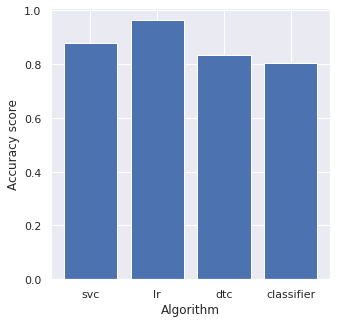

In [56]:
plt.bar(x = ['svc','lr','dtc','classifier'],height = [svc_acc,lr_acc,dtc_acc,classifier_acc])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy score')
plt.show()

##Hyperparameter Tuning for decision tree

In [57]:
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 50}
model_1 = DecisionTreeClassifier(**params_1)
model_1.fit(X_train, Y_train)
# Prediction sets
preds_1 = model_1.predict(X_test)
print(f'Accuracy on Model 1: {round(accuracy_score(Y_test, preds_1), 3)}')

Accuracy on Model 1: 0.826


In [58]:
# Get the accuracy scores
train_class_preds = model_1.predict(X_train)
test_class_preds = model_1.predict(X_test)
train_accuracy = accuracy_score(train_class_preds,Y_train)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  0.826


After hyperparameter tuning also there is no outstanding performance seen by model.

#Hyperparameter tuning for logistic regression

In [59]:
import numpy as np
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [60]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [61]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [62]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9640000000000001


After Hyperparameter tuning of logistic regression the accuracy Remains same.So we will accept the logistic regression model.

#Evaluation metrics

**Metrics that can provide better insight are:**

**Confusion Matrix**: a table showing correct predictions and types of incorrect predictions.

**Precision**: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.

**Recall**: the number of true positives divided by the number of positive values in the test data. The recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

**F1 Score**: the weighted average of precision and recall.

**Conclusions**

From Exploratory Data Analysis

1)Majorly impacting properties on price of phone are Ram, Battery power and pixel 
resolution. while clock speed ,mobile weight and whether it is screen touch phone or not 
impacting price of mobile negatively.

2) The battery power ranges between 600-2000.

3) Clock speed ranges between 0.6 to 3.

4) The random access memory of the phone ranges between 250 megabytes to 4000 
megabytes.

5) The hight of screen of mobile phones ranges between 3cm to 18cm.

6) The width of screen of mobile phones ranges between 2cm to 17cm.

7) The depth or thickness of mobile ranges between something around 0.2cm to 1cm.

8) The camera megapixels ranges between 1 to 20.

9) The front camera of mobile phones ranges between 1 mp to 17mp.

10)There is no class imbalance in Target Variable.


**From Models**

1)The best performing model is Logistic Regression as it stands outstanding in all 
Four algorithms with respect to Accuracy, Precision,Recall and F-1 Score.

2)After Logistic Regression the support vector classifier is the best model 
according to all evaluation Scores.

3)After hyperparameter tuning on logistic and Decision Tree model no 
outstanding performance noticed.

4)So we will accept the both models that is Logistic Regression Model and 
Support Vector Machine